## Assignment No.: (7)
### Canonical partition function of 2 bosons in three levels : 

Internal energy  = 2.6685400455335673 J
Energy fluctuation = 3.277439430059909 J
Specific heat at constant volume = 0.032774394300599086  (J/mol·K)
Free energy = 3.982829853663607 J
Entropy = 0.2668540045533567  (J/mol·K)


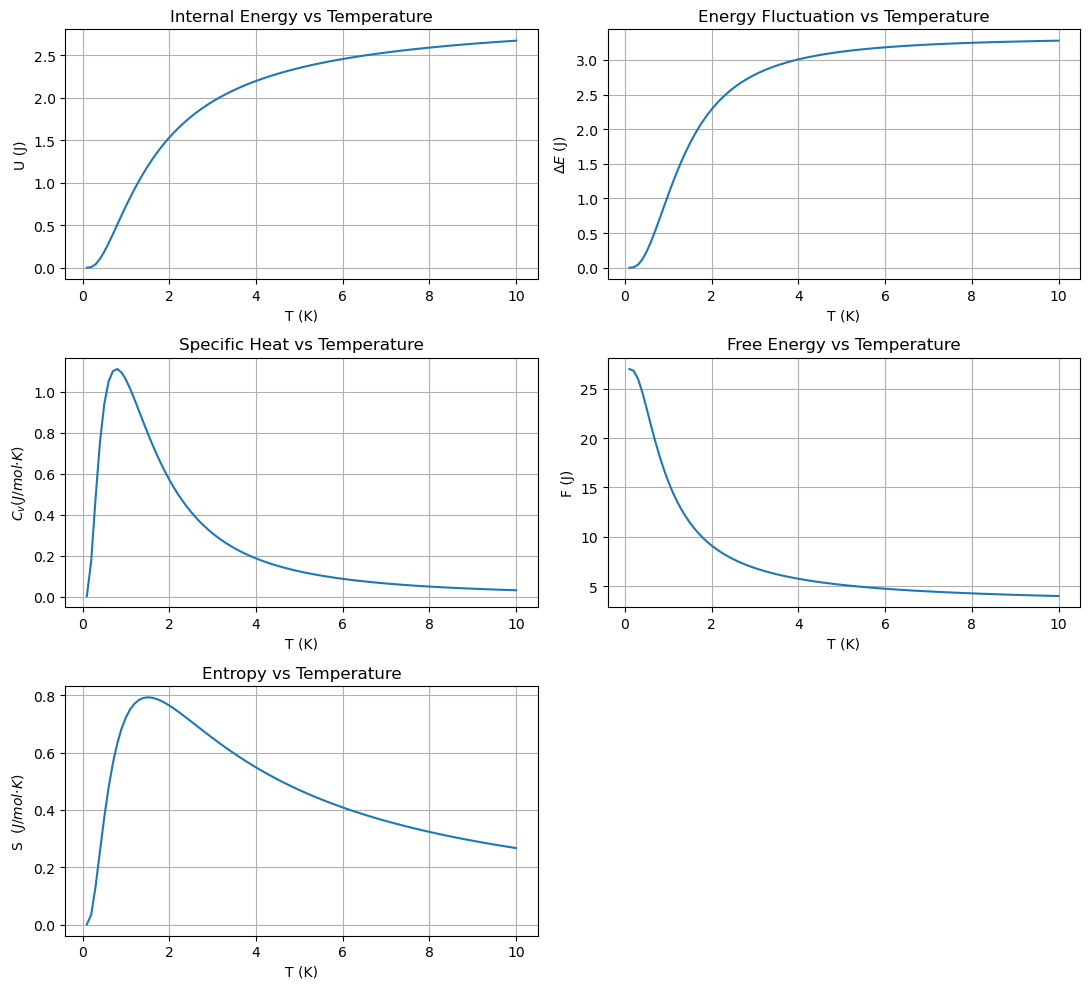

In [15]:
import math
import matplotlib.pyplot as plt


def partition_function(temperature):
    epsilon = 1.0  
    beta = 1.0 / temperature 

    Z = 0.0
    U = 0.0
    U_sq = 0.0
    F = 0.0
    S = 0.0
    for n1 in range(3):  # Number of bosons in level 𝜖
        for n2 in range(3):  # Number of bosons in level 2𝜖
            n3 = 2 - n1 - n2  # Number of bosons in level 3𝜖

            energy = n1 * epsilon + n2 * (2 * epsilon) + n3 * (3 * epsilon)

            Z += math.exp(-beta * energy)

            U += energy * math.exp(-beta * energy)
            U_sq += energy**2 * math.exp(-beta * energy)
            F -= (1.0 / beta) * math.log(math.exp(-beta * energy))
            S -= math.exp(-beta * energy) * math.log(math.exp(-beta * energy))

    # Normalize thermodynamic properties
    U /= Z
    U_sq /= Z
    F /= Z
    S /= Z

    Delta_E = U_sq - U**2
    Cv = (1.0 / (temperature**2)) * Delta_E

    return U, Delta_E, Cv, F, S

temperatures = [0.1 * i for i in range(1, 101)]
U_values = []
Delta_E_values = []
Cv_values = []
F_values = []
S_values = []

for T in temperatures:
    U, Delta_E, Cv, F, S = partition_function(T)
    U_values.append(U)
    Delta_E_values.append(Delta_E)
    Cv_values.append(Cv)
    F_values.append(F)
    S_values.append(S)

print(f"Internal energy  = {U} J")
print(f"Energy fluctuation = {Delta_E} J")
print(f"Specific heat at constant volume = {Cv}  (J/mol·K)")
print(f"Free energy = {F} J")
print(f"Entropy = {S}  (J/mol·K)")
    

plt.figure(figsize=(11,10))

plt.subplot(3, 2, 1)
plt.plot(temperatures, U_values)
plt.xlabel("T (K)")
plt.ylabel("U (J)")
plt.title("Internal Energy vs Temperature")
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(temperatures, Delta_E_values)
plt.xlabel("T (K)")
plt.ylabel(r"$\Delta E$ (J)")
plt.title("Energy Fluctuation vs Temperature")
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(temperatures, Cv_values)
plt.xlabel("T (K)")
plt.ylabel(r"$C_v  (J/mol·K)$")
plt.title("Specific Heat vs Temperature")
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(temperatures, F_values)
plt.xlabel("T (K)")
plt.ylabel("F (J)")
plt.title("Free Energy vs Temperature")
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(temperatures, S_values)
plt.xlabel("T (K)")
plt.ylabel(r"S  $(J/mol·K)$")
plt.title("Entropy vs Temperature")
plt.grid()

plt.tight_layout()
plt.show()
